# 斐波那契数列

In [7]:
def fibonci(n):
    arr = list(range(n+1))
    for i in range(n+1):
        if i<2:
            arr[i] = i
        else:
            arr[i] = arr[i-1]+arr[i-2]
    #返回数组最后一个值
    return arr[-1]
# print(fibonci(10))

55


# 路径问题（求最多的路径条数）

In [12]:
import numpy as np;
def diffTrace(n,m):
# 将二维列表初始化为1，以便之后用于缓存
#     arr = [[1] * m] * n
    arr = np.ones([n,m])
    for i in range(1,n):
        for j in range(1,m):
            arr[i][j] = arr[i-1][j] + arr[i][j-1]
    return arr[-1][-1]
# print(diffTrace(7,3))

28.0


# 在一个数组arr中，找出一组不相邻的数字，使得最后的和最大


In [6]:
arr = [1,2,4,1,7,8,3];
import numpy as np;
#递归动态问题求解
def rec_dp(arr,i):
    if(i==0):
        return arr[0];
    elif i==1:
        return max(arr[0],arr[1]);
    else:
        A = rec_dp(arr,i-2)+arr[i];
        B = rec_dp(arr,i-1);
    return max(A,B);
# res = rec_dp(arr,6);
#非递归
def noRec_dp(arr):
    array = np.zeros(len(arr));
    array[0] = arr[0];
    array[1] = max(arr[0],arr[1]);
    for i in range(len(arr)):
        A = array[i-2]+arr[i];
        B = array[i-1];
        array[i] = max(A,B);
    return array[len(arr)-1];
# res = noRec_dp(arr);
# print(res);

15.0


给定一个正整数s, 判断一个数组arr中，是否有一组数字加起来等于s。


In [10]:
arr = [3,34,4,12,5,2]
def rec_subset(arr,i,s):
    if s==0:
        return true
    elif i==0:
        return arr[0] == s
    elif arr[i]>s:
        return rec_subset(arr,i-1,s)
    else:
        A = rec_subset(arr,i-1,s-arr[i])
        B = rec_subset(arr,i-1,s)
    return A or B
#返回A或者B为真
# print(rec_subset(arr,len(arr)-1,10))
# print(rec_subset(arr,len(arr)-1,13))

True
False


# 编辑距离
给定两个单词 word1 和 word2，计算出将 word1 转换成 word2 所使用的最少操作数 

In [28]:
import numpy as np;
def edit_distance(word1,word2):
    n1,n2 = len(word1),len(word2)
    arr = np.zeros([n1+1,n2+1])
    #初始化0行和0列元素
    for i in range(n1+1):arr[i][0] = i
    for j in range(n2+1):arr[0][j] = j
    for i in range(1,n1+1):
        for j in range(1,n2+1):
            if word1[i-1] == word2[j-1]:temp = 0
            else:temp = 1
            arr[i][j] = min(arr[i-1][j-1] + temp,arr[i][j-1]+1,arr[i-1][j]+1)
    return arr[n1][n2]
print(edit_distance("jarrry", "jer"))

4.0


# 背包问题
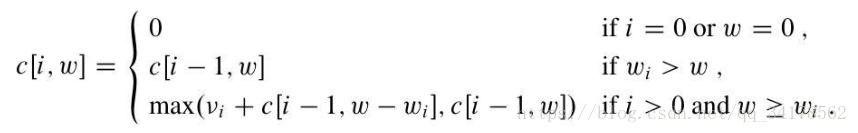

In [12]:
import numpy as np;
def bag(n,m,val,weight):
    arr = np.zeros([n+1,m+1])
    for i in range(1,n+1):
        for j in range(1,m+1):
            arr[i][j] = arr[i-1][j]#当选中的物品重要超过背包所承受重量
            if j >= weight[i-1] and arr[i][j] < arr[i-1][j-weight[i-1]]+val[i-1]:
                #在物品重量不超标的条件下，选取的物品重量最大的：原来的+现选的
                arr[i][j] = arr[i-1][j-weight[i-1]]+val[i-1]
    return arr
n = 6  #物品的数量，
c = 10 #书包能承受的重量，
w = [2, 2, 3, 1, 5, 2] #每个物品的重量，
v = [2, 3, 1, 5, 4, 3] #每个物品的价值
arr = bag(n,c,v,w)
print('最大价值为:',arr[n][c])
a = np.zeros(n,bool)
j = c
for i in range(n, 0, -1):
#从最后一个元素开始，倒序循环到0，-1表示为倒序
    if arr[i][j] > arr[i - 1][j]:
        a[i - 1] = True
        j -= w[i - 1]
print('背包中所装物品为:')
for i in range(n):
    if a[i]:
        print('第', i+1, '个,', end='')            

最大价值为: 15.0
背包中所装物品为:
第 2 个,第 4 个,第 5 个,第 6 个,